In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd

# Load the Titanic dataset from seaborn
titanic_data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Display the first few rows of the DataFrame
print(titanic_data.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
print(titanic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
 t2= titanic_data.drop(['PassengerId','Name','Ticket','Cabin',   'SibSp', 'Parch','Embarked'],axis=1)

In [ ]:
t2.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [ ]:

# Fill missing age values with the median age
t2['Age'] = t2['Age'].fillna(t2['Age'].median())

# Convert 'Sex' to numerical values (0 for female, 1 for male)
t2['Sex'] = t2['Sex'].map({'female': 0, 'male': 1})

# Separate features (X) and target (y)
X = t2.drop('Survived', axis=1)
y = t2['Survived']


In [ ]:
X

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
888,3,0,28.0,23.4500
889,1,1,26.0,30.0000


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the decision tree classifier: {accuracy}")


Accuracy of the decision tree classifier: 0.7430167597765364


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train the decision tree classifier with max_depth
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X_train, y_train)


# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the decision tree classifier: {accuracy}")


Accuracy of the decision tree classifier: 0.7988826815642458


Train Accuracy: 0.827247191011236
Accuracy: 0.7988826815642458
Train classification_report
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       444
           1       0.81      0.70      0.75       268

    accuracy                           0.83       712
   macro avg       0.82      0.80      0.81       712
weighted avg       0.83      0.83      0.82       712

Test classification_report
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Train Confusion Matrix:
[[401  43]
 [ 80 188]]


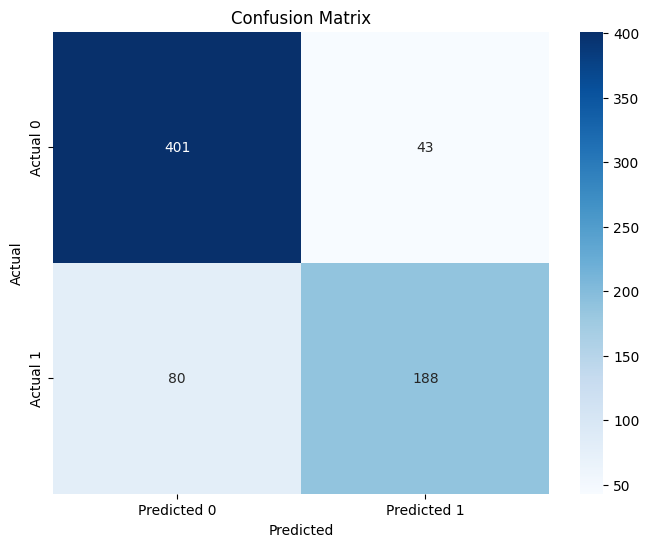

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Make predictions on the test set
y_predr = clf.predict(X_train)
# Make predictions on the test set
y_preds = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_train, y_predr)
print(f"Train Accuracy: {accuracy}")

accuracy = accuracy_score(y_test, y_preds)
print(f"Accuracy: {accuracy}")
print("Train classification_report")
print(classification_report(y_train, y_predr))
print("Test classification_report")
print(classification_report(y_test, y_preds))
# Confusion Matrix
cm = confusion_matrix( y_train , y_predr)
print("Train Confusion Matrix:")
print(cm)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

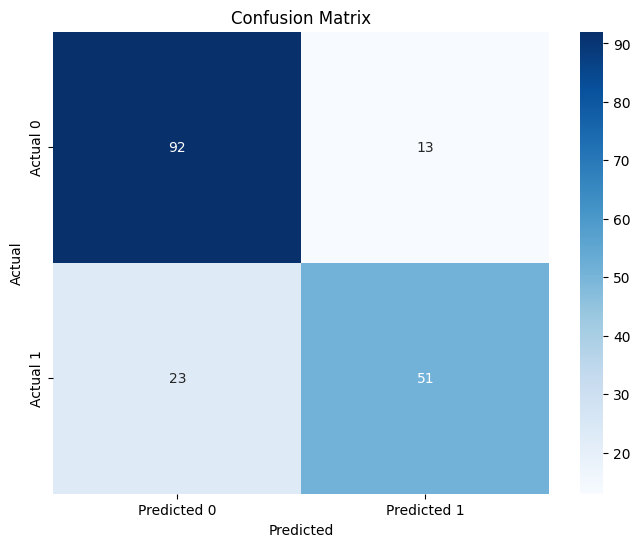

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


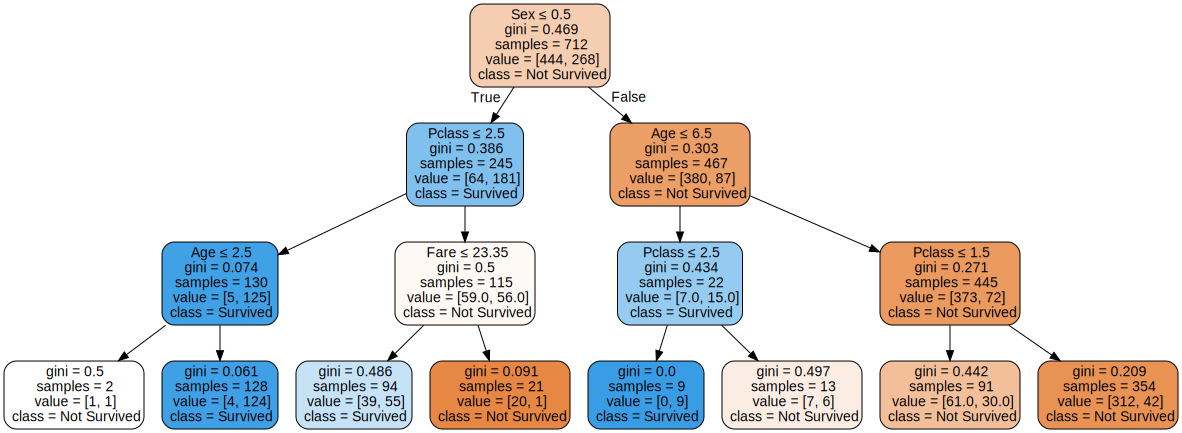

In [ ]:
#To Visualize the tree:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None,
                         feature_names=X.columns,
                         class_names=['Not Survived', 'Survived'],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph


In [ ]:
# prompt: i want to try multi model

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# ... (Your existing code) ...

# Initialize and train a Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_y_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Accuracy of the Random Forest classifier: {rf_accuracy}")


# Initialize and train an SVM classifier
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)
svm_y_pred = svm_clf.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"Accuracy of the SVM classifier: {svm_accuracy}")


# Initialize and train a Logistic Regression classifier
logreg_clf = LogisticRegression(random_state=42, max_iter=1000) # Increased max_iter
logreg_clf.fit(X_train, y_train)
logreg_y_pred = logreg_clf.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_y_pred)
print(f"Accuracy of the Logistic Regression classifier: {logreg_accuracy}")
